Métodos de la clase gymnasium:

reset(self) : Reinicia el estado del entorno, a su estado inicial, devolviendo una observación de dicho estado.

step(self, action) : "Avanza" un timestep. Devuelve: observation, reward, done, info.

render(self) : Muestra en pantalla el entorno.

close(self) : Finaliza con la instancia del agente.

seed(self) : Establece la semilla aleatoria del generador de números aleatorios del presente entorno.

Atributos de la clase gymnasium:

action_space : El objeto de tipo Space correspondiente al espacio de acciones válidas.

observation_space : El objeto de tipo Space correspondiente a todos los rangos posibles de observaciones.

reward_range : Tupla que contiene los valores mínimo y máximo de recompensa posible.

In [2]:
import gymnasium as gym
import numpy as npy
import random as rng
import matplotlib.pyplot as plot

Para calcular la posición en la matriz he empleado la siguiente fórmula:

20 * (A - minSuma) + (B - 1) + 10 * C

Siendo A la suma acumulada del jugador, B la carta que muestra el dealer y C es 1 o 0 en función de si el as se usa como 11 o como 1 respectivamente

minSuma es la suma mínima que puede acumular el jugador, es decir, 4

La matriz tiene 360 posiciones puesto que max(A) = 21, max(B) = 10 y max(C) = 1 que al sustituirlo en la fórmula da 359 (cuando la suma del jugador supere 21 se devolverá un valor negativo para indicar que es una acción penalizada)

In [3]:
env = gym.make('Blackjack-v1', natural=True, sab=False)
#env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode = "human")

maxValor = 360
#Inicializo toda la Matriz Q-Learning a 0 (Dimensiones de 360x2)
matrizQ = npy.zeros([maxValor, env.action_space.n])

Celda de parámetros

In [4]:
reiniciado = npy.all(matrizQ == 0) #Miro si la matriz Q ha sido reiniciada o no
medias = [] #Lista donde almaceno las medias de las distintas simulaciones
a = 0.6 #Valor de alpha (α) 
y = 0.9 #Valor de gamma (γ)
e = 0.75 #Valor de epsilon (ε)
episodios = 10000 #Numero de episodios que se van a ejecutar por simulacion
ourMod = 10 #Modificador auxiliar por si queremos aumentar o disminuir la recompensa predeterminada
castigos = 0 #Numero de penalizaciones que se han recibido
minSuma = 4 #Valor necesario para calcular las posiciones en la matriz

Celda de simulación

In [5]:
for i in range(episodios):

    print("Episodio Nº" + str(i) + "\n")
    estado = env.reset()
    A, B, C = estado[0]
    pos =  20 * (A - minSuma) + (B - 1) + 10 * C
    done = False
    print("Estado inicial: " + str(estado[0]))
    print("Posicion en la matriz: " + str(pos))
    print("··························")

    while not done:
        #env.render()
        if(rng.uniform(0, 1) < e): #Exploracion
            accion = env.action_space.sample()
        else: #Explotacion
            accion = npy.argmax(matrizQ[pos]) 

        estadoNext, recompensa, done, info, info2 = env.step(accion)

        recompensa *= ourMod
        nextA, nextB, nextC = estadoNext
        posNext = 20 * (nextA - minSuma) +  (nextB - 1) + 10 * nextC
        #Si posNext >= maxValor significa que tengo una suma superior a 21
        siguienteMax = npy.max(matrizQ[posNext]) if posNext < maxValor else -ourMod

        valorAntiguo = matrizQ[pos, accion]
        valorNuevo = (1 - a) * valorAntiguo + a * (recompensa + y * siguienteMax)
        matrizQ[pos, accion] = valorNuevo
        
        if recompensa < 0: castigos += 1

        print ("Se planta") if accion == 0 else print("Pide")
        print("Estado siguiente: " + str(estadoNext))
        print("Posicion en la matriz: " + str(posNext))
        print("Recompensa: " + str(recompensa))
        print("Valor previo a la accion: " + str(valorAntiguo))
        print("Valor posterior a la accion: " + str(valorNuevo))
        
        estado = estadoNext
        pos = posNext
        if not done: print("··························")
            
    print("\n========================================\n")

#env.close()
medias.append(npy.average(matrizQ))


Episodio Nº0

Estado inicial: (13, 3, 0)
Posicion en la matriz: 182
··························
Se planta
Estado siguiente: (13, 3, 0)
Posicion en la matriz: 182
Recompensa: -10.0
Valor previo a la accion: 0.0
Valor posterior a la accion: -6.0


Episodio Nº1

Estado inicial: (15, 10, 0)
Posicion en la matriz: 229
··························
Se planta
Estado siguiente: (15, 10, 0)
Posicion en la matriz: 229
Recompensa: -10.0
Valor previo a la accion: 0.0
Valor posterior a la accion: -6.0


Episodio Nº2

Estado inicial: (5, 7, 0)
Posicion en la matriz: 26
··························
Pide
Estado siguiente: (14, 7, 0)
Posicion en la matriz: 206
Recompensa: 0.0
Valor previo a la accion: 0.0
Valor posterior a la accion: 0.0
··························
Pide
Estado siguiente: (24, 7, 0)
Posicion en la matriz: 406
Recompensa: -10.0
Valor previo a la accion: 0.0
Valor posterior a la accion: -11.4


Episodio Nº3

Estado inicial: (8, 5, 0)
Posicion en la matriz: 84
··························
Pide
Esta

In [8]:
print("Número de castigos totales: {}".format(castigos))
for i in range(maxValor):
    print("Fila Nº{}: {}".format(i, matrizQ[i]))

Número de castigos totales: 6290
Fila Nº0: [-11.63550991  -7.56090737]
Fila Nº1: [10.645104  0.      ]
Fila Nº2: [-6.         12.64996403]
Fila Nº3: [-0.36       11.04739501]
Fila Nº4: [1.37738079 4.19902393]
Fila Nº5: [-6.  0.]
Fila Nº6: [20.29224396 13.36299969]
Fila Nº7: [ 0.         15.17587424]
Fila Nº8: [-8.4        15.24674818]
Fila Nº9: [20.5966745   8.66642119]
Fila Nº10: [0. 0.]
Fila Nº11: [0. 0.]
Fila Nº12: [0. 0.]
Fila Nº13: [0. 0.]
Fila Nº14: [0. 0.]
Fila Nº15: [0. 0.]
Fila Nº16: [0. 0.]
Fila Nº17: [0. 0.]
Fila Nº18: [0. 0.]
Fila Nº19: [0. 0.]
Fila Nº20: [-8.7723977   0.37343835]
Fila Nº21: [6.07462968 7.40956829]
Fila Nº22: [2.72125159 7.27040612]
Fila Nº23: [-2.38002239 22.80132258]
Fila Nº24: [ 3.33298375 13.86752639]
Fila Nº25: [10.645104    7.55327608]
Fila Nº26: [-8.4        15.35517131]
Fila Nº27: [3.32959776 4.21136256]
Fila Nº28: [-6.         15.05833172]
Fila Nº29: [25.6246035  16.21271598]
Fila Nº30: [0. 0.]
Fila Nº31: [0. 0.]
Fila Nº32: [0. 0.]
Fila Nº33: [0. 0

Celdas de gráfico

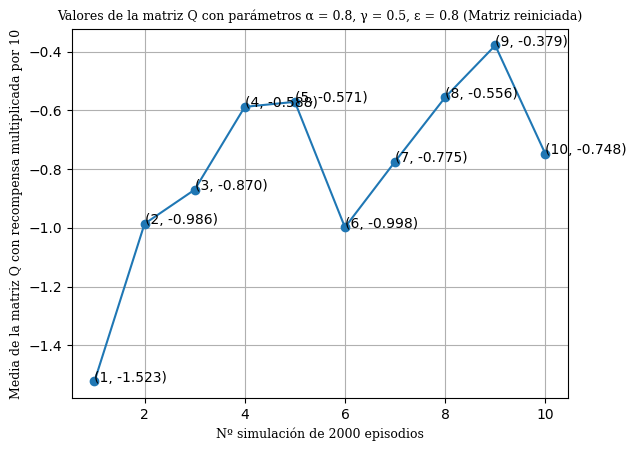

In [15]:
x = [i for i in range(1, len(medias) + 1)]
plot.plot(x, medias, marker = 'o')
for ab in zip(x, medias):
    plot.annotate('(%d, %.3f)' % ab, xy = ab)
font = {'family':'serif', 'color':'black', 'size': 9}
plot.ylabel("Media de la matriz Q con recompensa multiplicada por {}".format(ourMod), fontdict = font)
plot.xlabel("Nº simulación de {} episodios".format(episodios), fontdict = font)
plot.title("Valores de la matriz Q con parámetros α = {}, γ = {}, ε = {} (Matriz {})".format(a, y, e
            ,"reiniciada" if reiniciado else "sin reiniciar"), fontdict = font)
plot.grid()
plot.show()

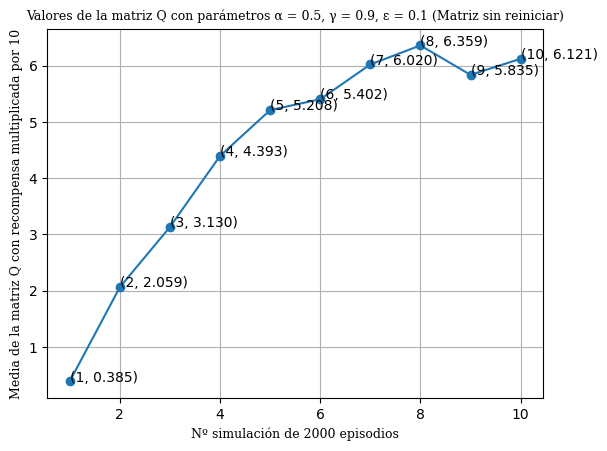

In [27]:
x = [i for i in range(1, len(medias) + 1)]
plot.plot(x, medias, marker = 'o')
for ab in zip(x, medias):
    plot.annotate('(%d, %.3f)' % ab, xy = ab)
font = {'family':'serif', 'color':'black', 'size': 9}
plot.ylabel("Media de la matriz Q con recompensa multiplicada por {}".format(ourMod), fontdict = font)
plot.xlabel("Nº simulación de {} episodios".format(episodios), fontdict = font)
plot.title("Valores de la matriz Q con parámetros α = {}, γ = {}, ε = {} (Matriz {})".format(a, y, e
            ,"reiniciada" if reiniciado else "sin reiniciar"), fontdict = font)
plot.grid()
plot.show()

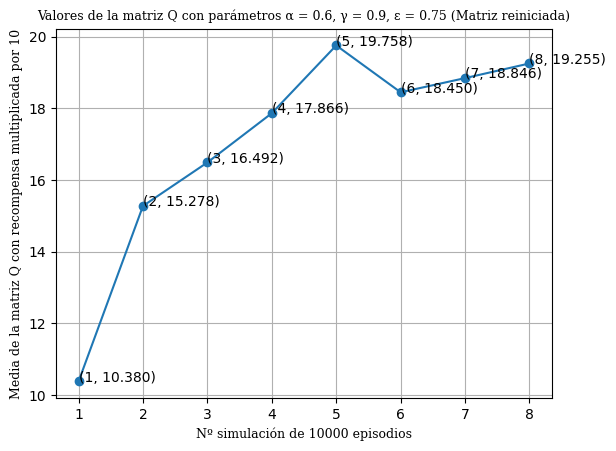

In [38]:
x = [i for i in range(1, len(medias) + 1)]
plot.plot(x, medias, marker = 'o')
for ab in zip(x, medias):
    plot.annotate('(%d, %.3f)' % ab, xy = ab)
font = {'family':'serif', 'color':'black', 'size': 9}
plot.ylabel("Media de la matriz Q con recompensa multiplicada por {}".format(ourMod), fontdict = font)
plot.xlabel("Nº simulación de {} episodios".format(episodios), fontdict = font)
plot.title("Valores de la matriz Q con parámetros α = {}, γ = {}, ε = {} (Matriz {})".format(a, y, e
            ,"reiniciada" if reiniciado else "sin reiniciar"), fontdict = font)
plot.grid()
plot.show()